# TensorFlow Tutorial

<br><br>


# 1 - Exploring the Tensorflow Library

In [6]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)
print(tf.__version__) # 1.8

1.8.0


$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 $$

In [7]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39
loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss
init = tf.global_variables_initializer()         # When init is run later (session.run(init)),                                                 # the loss variable will be initialized and ready to be computed

with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value.


**A placeholder is an object whose value you can specify only later.** 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [4]:
# Change the value of x in the feed_dict
x = tf.placeholder(tf.int64, name = 'x')
sess = tf.Session()
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When you first defined `x` you did not have to specify a value for it. A placeholder is simply a variable that you will assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

## 1.1 - Linear Function

Compute the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```

- tf.matmul(..., ...) to do a matrix multiplication


In [8]:
# GRADED FUNCTION: linear_function
def linear_function(): 
    np.random.seed(1)

    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W,X),b)    
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate   
    sess = tf.Session()
    result = sess.run(Y)
    sess.close()   # close the session 
    return result

## 1.2 - Computing the Sigmoid

Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`..
Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)



In [9]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32,name='x')

    sigmoid = tf.sigmoid(x)  # compute sigmoid(x)
    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess:
        # Run session and call the output "result"
        result = sess.run(sigmoid,feed_dict = { x:z })

    return result

<font color='blue'>
    
**To summarize, you how know how to**:
    
1. Create placeholders
2. Specify the computation graph corresponding to operations you want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

## 1.3 - Computing the Cost

Your code should input `z`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$

- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`


In [11]:
# GRADED FUNCTION: cost
def cost(logits, labels):

    # Create the placeholders for "logits" (z) and "labels" (y) 
    z = tf.placeholder(dtype=tf.float32,name="z")
    y = tf.placeholder(dtype=tf.float32,name="y")
    
    # Use the loss function 
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
    
    sess = tf.Session()
    cost = sess.run(cost,feed_dict={z:logits,y:labels})
    sess.close()

    return cost

## 1.4 - Using One Hot Encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:


<img src="images/onehot.png" style="width:600px;height:150px;">

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code: 

- tf.one_hot(labels, depth, axis) 

In [12]:
# GRADED FUNCTION: one_hot_matrix
def one_hot_matrix(labels, C):   
    # Create a tf.constant equal to C (depth), name it 'C'. 
    C = tf.constant(C,name="C")
    # Use tf.one_hot, be careful with the axis 
    one_hot_matrix = tf.one_hot(labels, C, axis=0) 

    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot

## 1.5 - Initialize with zeros and ones

Now you will learn how to initialize a vector of zeros and ones. The function you will be calling is `tf.ones()`. To initialize with zeros you could use tf.zeros() instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 

 - tf.ones(shape)


In [13]:
# GRADED FUNCTION: ones
def ones(shape):
    # Create "ones" tensor using tf.ones(...). 
    ones = tf.ones(shape,dtype=tf.float32)   

    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()

    return ones

# 2 - Building your first neural network in tensorflow

In this part of the assignment you will build a neural network using tensorflow. Remember that there are two parts to implement a tensorflow model:

- Create the computation graph
- Run the graph
<br><br>


## 2.0 - Problem statement: SIGNS Dataset


- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

y = 5


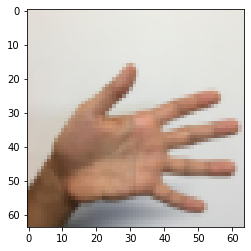

In [14]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [15]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. Please make sure all these shapes make sense to you before continuing.

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

<br><br>

## 2.1 - Create placeholders

Your first task is to create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

In [16]:
  # GRADED FUNCTION: create_placeholders
def create_placeholders(n_x, n_y):
    X = tf.placeholder(dtype=tf.float32,shape=[n_x,None])
    Y = tf.placeholder(dtype=tf.float32,shape=[n_y,None])
    return X, Y

## 2.2 - Initializing the parameters


In [17]:
# GRADED FUNCTION: initialize_parameters
def initialize_parameters():
    tf.set_random_seed(1)                  

    W1 = tf.get_variable("W1",[25,12288],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2",[12,25],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[12,1],initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3",[6,12],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[6,1],initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

## 2.3 - Forward propagation in tensorflow 

You will now implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass. The functions you will be using are: 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

**Question:** Implement the forward pass of the neural network. We commented for you the numpy equivalents so that you can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, you don't need `a3`!



In [19]:
# GRADED FUNCTION: forward_propagation
def forward_propagation(X, parameters):

    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']    
                                                                     # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                             # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

You may have noticed that the forward propagation doesn't output any cache. You will understand why below, when we get to brackpropagation.
<br><br>
## 2.4 Compute cost

As seen before, it is very easy to compute the cost using:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**Question**: Implement the cost function below. 
- It is important to know that the "`logits`" and "`labels`" inputs of `tf.nn.softmax_cross_entropy_with_logits` are expected to be of shape (number of examples, num_classes). We have thus transposed Z3 and Y for you.
- Besides, `tf.reduce_mean` basically does the summation over the examples.

In [20]:
# GRADED FUNCTION: compute_cost 
def compute_cost(Z3, Y):
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y) 

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

## 2.5 - Backward propagation & parameter updates


After you compute the cost function. You will create an "`optimizer`" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

**Note** When coding, we often use `_` as a "throwaway" variable to store values that we won't need to use later. Here, `_` takes on the evaluated value of `optimizer`, which we don't need (and `c` takes the value of the `cost` variable). 

## 2.6 - Building the model

Now, bring it all together! 



In [22]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    X, Y = create_placeholders(n_x,n_y)     # Create Placeholders of shape (n_x, n_y)
    parameters = initialize_parameters()     # Initialize parameters
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X,parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3,Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()    # Initialize all the variables

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict = {X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
                
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572938
Cost after epoch 400: 0.468799
Cost after epoch 500: 0.380979
Cost after epoch 600: 0.313819
Cost after epoch 700: 0.254258
Cost after epoch 800: 0.203795
Cost after epoch 900: 0.166410
Cost after epoch 1000: 0.141497
Cost after epoch 1100: 0.107579
Cost after epoch 1200: 0.086229
Cost after epoch 1300: 0.059415
Cost after epoch 1400: 0.052237


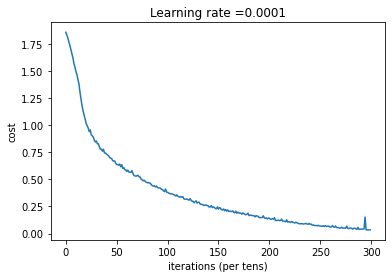

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.71666664


In [23]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Insights**:
- Your model seems big enough to fit the training set well. However, given the difference between train and test accuracy, you could try to add L2 or dropout regularization to reduce overfitting. 
- Think about the session as a block of code to train the model. Each time you run the session on a minibatch, it trains the parameters. In total you have run the session a large number of times (1500 epochs) until you obtained well trained parameters.

## 2.7 - Test with your own image (optional / ungraded exercise)


Your algorithm predicts: y = 3


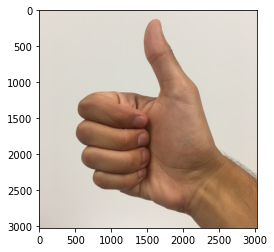

In [24]:
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np
import imageio
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##
# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image =imageio.imread(fname)
my_image = np.array(Image.fromarray(image).resize((64,64))).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

You indeed deserved a "thumbs-up" although as you can see the algorithm seems to classify it incorrectly. The reason is that the training set doesn't contain any "thumbs-up", so the model doesn't know how to deal with it! We call that a "mismatched data distribution" and it is one of the various of the next course on "Structuring Machine Learning Projects".

<font color='blue'>
    
**What you should remember**:
    
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators. 
- When you code in tensorflow you have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- You can execute the graph multiple times as you've seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.